In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
df = pd.read_csv(
    r"C:\Users\Windows\Downloads\Bhai Work\Intership Task\Task 01\SMSSpamCollection",
    sep='\t',  # The file uses tab-separated values
    header=None,
    names=['label', 'text']
)

In [6]:
import string
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['text'] = df['text'].apply(clean_text)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Binary encoding


In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.9650224215246637
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



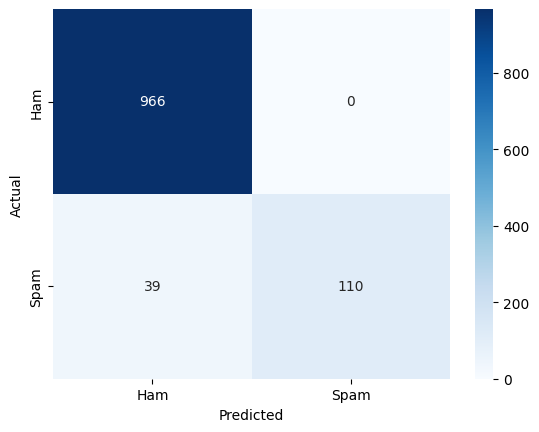

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
import pickle

# Save model
with open("spam_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


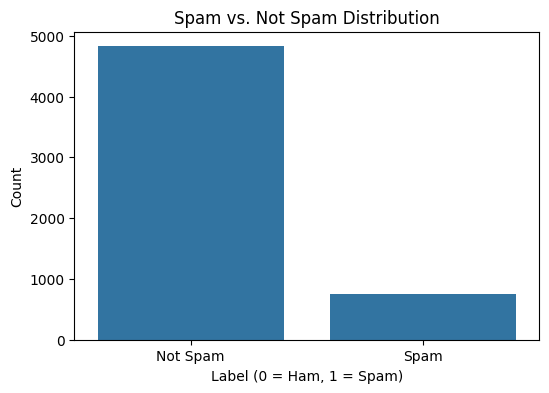

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Spam vs. Not Spam Distribution")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Spam", "Spam"])
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Windows\AppData\Local\Temp\ipykernel_7724\3019637853.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_df, x='count', y='word', palette='Reds_r')


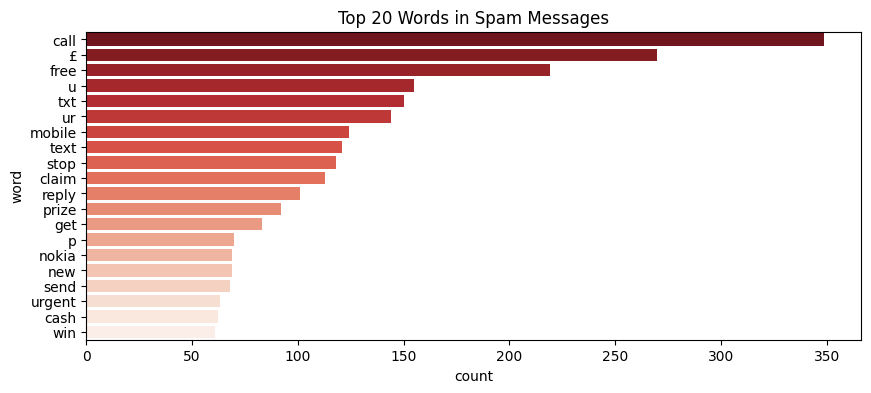

C:\Users\Windows\AppData\Local\Temp\ipykernel_7724\3019637853.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_df, x='count', y='word', palette='Blues_r')


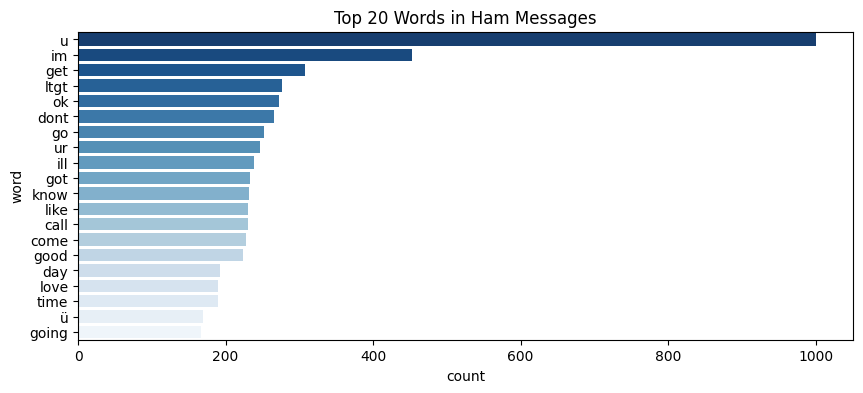

In [13]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Separate spam and ham messages
spam_words = ' '.join(df[df['label'] == 1]['text']).split()
ham_words = ' '.join(df[df['label'] == 0]['text']).split()

# Filter stopwords and count
spam_word_freq = Counter([word for word in spam_words if word not in stop_words])
ham_word_freq = Counter([word for word in ham_words if word not in stop_words])

# Top 20
top_spam = spam_word_freq.most_common(20)
top_ham = ham_word_freq.most_common(20)

# Plot spam
spam_df = pd.DataFrame(top_spam, columns=['word', 'count'])
plt.figure(figsize=(10,4))
sns.barplot(data=spam_df, x='count', y='word', palette='Reds_r')
plt.title("Top 20 Words in Spam Messages")
plt.show()

# Plot ham
ham_df = pd.DataFrame(top_ham, columns=['word', 'count'])
plt.figure(figsize=(10,4))
sns.barplot(data=ham_df, x='count', y='word', palette='Blues_r')
plt.title("Top 20 Words in Ham Messages")
plt.show()


C:\Users\Windows\AppData\Local\Temp\ipykernel_7724\1304280638.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positive, x='coef', y='feature', palette='Greens_r')


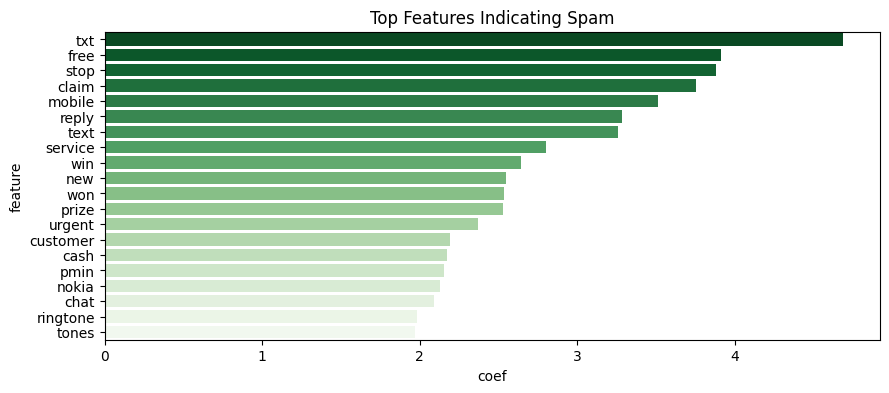

C:\Users\Windows\AppData\Local\Temp\ipykernel_7724\1304280638.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative, x='coef', y='feature', palette='Purples_r')


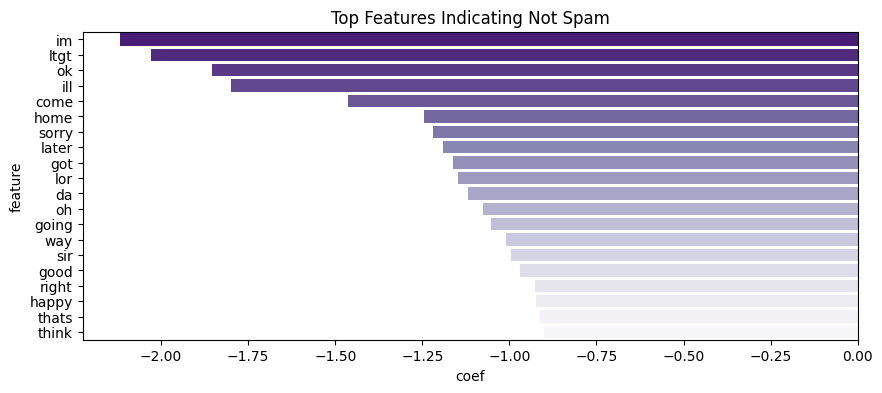

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

feature_names = vectorizer.get_feature_names_out()
coefs = lr_model.coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})

top_positive = coef_df.sort_values('coef', ascending=False).head(20)
top_negative = coef_df.sort_values('coef').head(20)

plt.figure(figsize=(10,4))
sns.barplot(data=top_positive, x='coef', y='feature', palette='Greens_r')
plt.title("Top Features Indicating Spam")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(data=top_negative, x='coef', y='feature', palette='Purples_r')
plt.title("Top Features Indicating Not Spam")
plt.show()


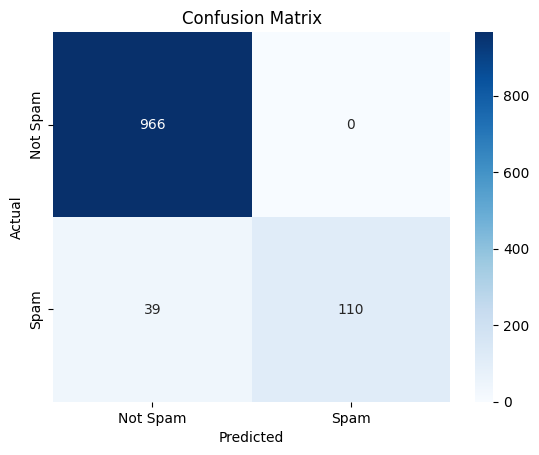

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


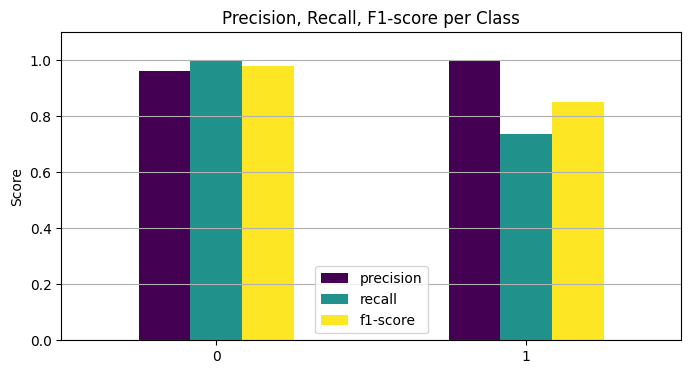

In [16]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df.iloc[:2][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8,4), colormap='viridis')
plt.title("Precision, Recall, F1-score per Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.show()


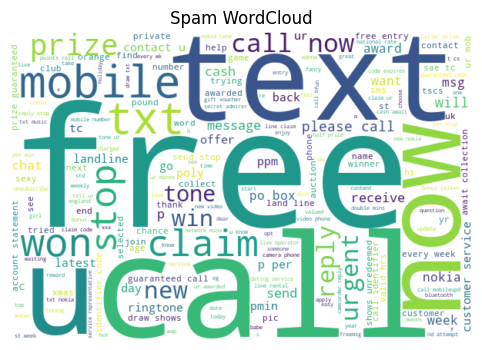

In [17]:
from wordcloud import WordCloud

# Spam WordCloud
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(' '.join(df[df['label'] == 1]['text']))
plt.figure(figsize=(8, 4))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Spam WordCloud")
plt.show()
